In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import markov_clustering as mc
import networkx as nx

In [158]:
cluster_colors = [np.random.randint(64, 256, 3) for i in range(10000)]

In [215]:
nodes = pd.read_json(r"..\bin\Debug\netcoreapp2.2\maps2\prob-002.graph", orient='records', lines = True)

In [216]:
nodes = nodes.sort_values('Id')
nodes['cluster_0'] = nodes.Id

In [271]:
edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
edges['connectedId'] = np.concatenate(np.array(nodes.ConnectedIds))

In [219]:
for i in range(1, 2):
    old_cluster_field = f"cluster_{i-1}"
    new_cluster_field = f"cluster_{i}"
    
    id_nodes = nodes.set_index('Id')
    edges['cluster1'] = np.array(id_nodes.loc[edges.Id][old_cluster_field])
    edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId][old_cluster_field])
    
    edges_strength=edges.groupby(['cluster1', 'cluster2']).size().reset_index()
    
    graph = nx.Graph()
    graph.add_weighted_edges_from(edges_strength.apply(lambda x: (x.cluster1, x.cluster2, x[0]), axis = 1))
    
    matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes[old_cluster_field].max() + 1))
    result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=400)
    clusters = mc.get_clusters(result)
    
    nodes_clusters = np.zeros(nodes[old_cluster_field].max() + 1, dtype=int)
    
    for i in range(len(clusters)):
        nodes_clusters[list(clusters[i])] = i
    nodes[new_cluster_field] = nodes[old_cluster_field].map(lambda x: nodes_clusters[x])
    nodes[new_cluster_field+'_color'] = nodes[new_cluster_field].map(lambda i: cluster_colors[i])

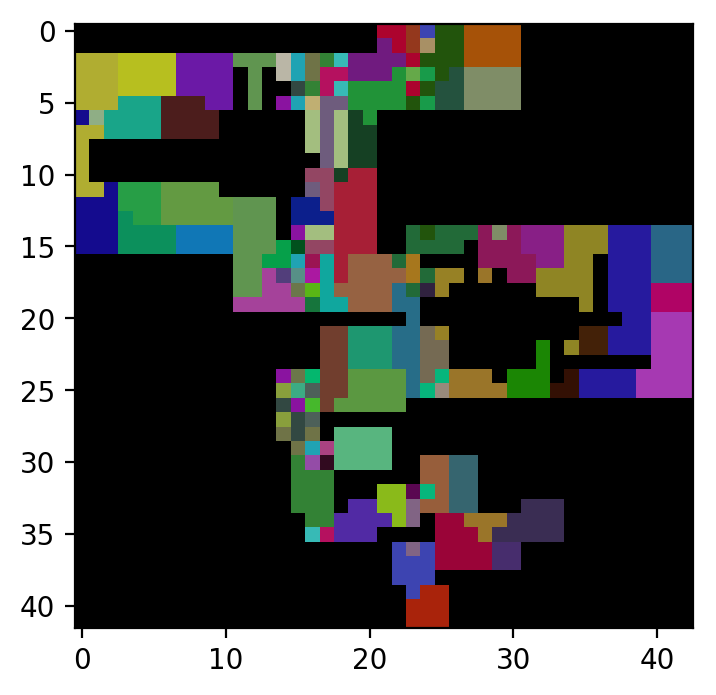

In [220]:
image = np.zeros((nodes.X.max() + 1, nodes.Y.max() + 1, 3))
for node in nodes.iterrows():
    image[node[1].X, node[1].Y] = node[1].cluster_1_color
plt.imshow(image[:,:])

In [149]:
edges = pd.DataFrame(np.repeat(nodes.Id, nodes.apply(lambda x: len(x.ConnectedIds), axis = 1)))
edges['connectedId'] = np.concatenate(nodes.ConnectedIds)

In [150]:
id_nodes = nodes.set_index('Id')
edges['cluster1'] = np.array(id_nodes.loc[edges.Id].cluster)
edges['cluster2'] = np.array(id_nodes.loc[edges.connectedId].cluster)
edges_strength=edges.groupby(['cluster1', 'cluster2']).size()

matrix = nx.adjacency_matrix(graph, nodelist=np.arange(0, nodes.cluster.max()+1))
result = mc.run_mcl(matrix, inflation=2, expansion=2, iterations=400)
clusters = mc.get_clusters(result) 

In [151]:
nodes_clusters = np.zeros(id_nodes.loc[edges.Id].cluster.max()+1, dtype=int)
for i in np.arange(len(clusters)):
    nodes_clusters[list(clusters[i])] = i

In [152]:
nodes['cluster_2'] = nodes.cluster.map(lambda i: nodes_clusters[i])
nodes['cluster_2_color'] = nodes.cluster_2.map(lambda i: cluster_colors[i])